# Neural Networks from scratch

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv('train.csv')

In [2]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [3]:
Y_train

array([2, 4, 2, ..., 7, 5, 2], dtype=int64)

In [4]:
test = np.random.rand(10, 784) - 0.5
X_train.shape

(784, 41000)

In [5]:
def init_params():
    W1 = np.random.rand(32, 784) - 0.5
    b1 = np.random.rand(32, 1) - 0.5
    W2 = np.random.rand(10, 32) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [6]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [7]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 100)

Iteration:  0
[1 1 3 ... 0 0 3] [2 4 2 ... 7 5 2]
0.11895121951219512
Iteration:  10
[6 1 2 ... 6 0 2] [2 4 2 ... 7 5 2]
0.30273170731707316
Iteration:  20
[9 1 2 ... 9 0 2] [2 4 2 ... 7 5 2]
0.45751219512195124
Iteration:  30
[9 1 2 ... 7 5 2] [2 4 2 ... 7 5 2]
0.5430487804878049
Iteration:  40
[9 6 2 ... 7 5 2] [2 4 2 ... 7 5 2]
0.6003170731707317
Iteration:  50
[9 6 2 ... 7 5 2] [2 4 2 ... 7 5 2]
0.6431951219512195
Iteration:  60
[9 6 2 ... 7 5 2] [2 4 2 ... 7 5 2]
0.6761707317073171
Iteration:  70
[9 6 2 ... 7 5 2] [2 4 2 ... 7 5 2]
0.7006829268292682
Iteration:  80
[9 9 2 ... 7 5 2] [2 4 2 ... 7 5 2]
0.7218048780487805
Iteration:  90
[9 9 2 ... 7 5 2] [2 4 2 ... 7 5 2]
0.739


In [8]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [9]
Label:  2


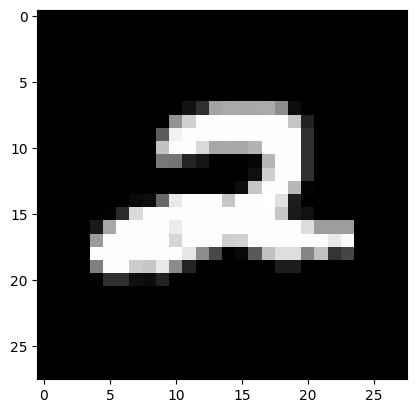

Prediction:  [9]
Label:  4


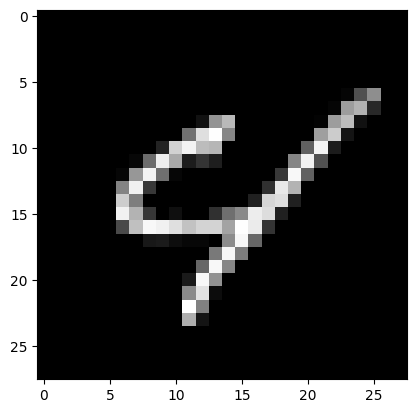

Prediction:  [2]
Label:  2


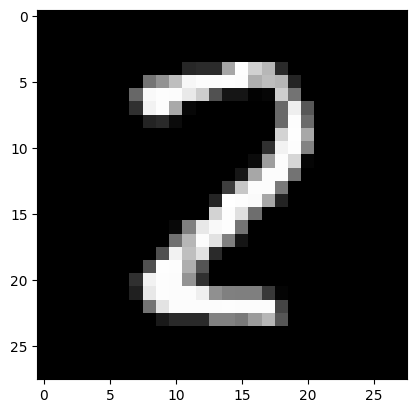

Prediction:  [8]
Label:  8


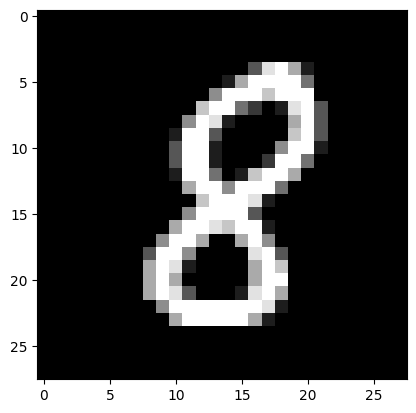

In [9]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [10]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[4 5 2 1 9 1 1 6 0 2 6 3 7 2 0 3 7 2 9 6 7 5 6 3 6 2 1 7 6 2 0 5 3 4 2 9 4
 7 2 7 7 3 2 4 1 3 2 6 2 3 3 3 6 7 0 8 6 3 4 0 7 7 8 9 9 3 1 1 9 7 0 8 1 3
 2 4 5 7 3 6 1 2 4 3 2 4 4 7 6 2 8 9 9 4 4 2 6 4 3 3 3 0 7 1 7 5 1 2 2 7 7
 5 0 9 7 6 4 1 0 5 1 6 9 7 2 6 1 1 9 1 6 3 3 7 2 4 6 0 2 4 0 0 5 2 0 9 0 2
 1 7 8 7 3 8 3 3 3 6 5 1 7 1 9 4 7 2 7 0 6 9 4 1 2 7 1 9 3 5 6 2 8 5 6 4 0
 1 0 6 8 3 9 4 1 1 9 7 1 4 7 0 2 3 1 5 6 7 3 8 5 1 2 1 3 6 1 5 8 2 7 8 7 8
 7 4 3 7 8 7 5 1 8 7 7 8 1 8 0 0 3 5 3 6 2 7 4 0 4 6 0 2 3 0 5 3 5 4 4 7 2
 0 4 4 0 4 1 7 8 7 4 0 2 7 3 0 6 2 2 3 6 4 2 6 1 3 6 1 7 6 9 6 6 1 0 5 4 3
 4 0 1 8 6 1 8 6 4 8 4 9 4 2 2 9 6 7 1 0 8 9 2 8 4 9 3 7 1 3 7 8 6 6 3 7 9
 0 0 1 1 6 0 1 7 8 9 2 9 4 8 3 1 2 7 7 1 6 4 2 1 4 0 2 7 0 6 7 1 0 5 0 8 4
 6 2 0 9 4 8 1 1 7 1 5 4 7 7 2 0 3 9 4 8 9 8 7 9 3 8 0 1 2 0 9 2 8 2 4 1 7
 7 3 0 6 7 9 1 2 7 3 3 9 0 5 3 7 6 7 5 3 0 6 2 5 1 2 2 1 4 4 6 0 8 2 0 1 4
 4 0 1 8 2 1 2 2 2 0 3 5 9 8 5 2 6 2 9 4 6 9 2 6 1 7 9 6 8 1 9 3 7 6 4 6 9
 7 6 9 7 3 1 1 0 3 5 2 2 

0.754

# TensorFlow

In [11]:
import tensorflow as tf
print(tf.keras.__version__)

3.3.3


In [12]:
# loading datasets
mnist = tf.keras.datasets.mnist
(X_train,Y_train),(X_test,Y_test) = mnist.load_data()

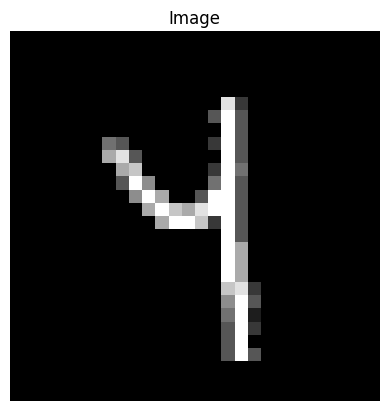

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming X_test contains MNIST data as previously loaded
img = np.array(X_train[1004], dtype=np.uint8)  # Convert to uint8 for imshow

# Plot the image using Matplotlib
plt.imshow(img, cmap='gray')  # Display the image in grayscale
plt.title('Image')  # Set the title of the plot
plt.axis('off')  # Hide axes ticks and labels
plt.show()  # Display the plot


In [14]:
print(f"shape of X_train is {X_train.shape} and shape of Y_train is {Y_train.shape} ")
print(f"shape of X_test is {X_test.shape} and shape of Y_test is {Y_test.shape} ")

shape of X_train is (60000, 28, 28) and shape of Y_train is (60000,) 
shape of X_test is (10000, 28, 28) and shape of Y_test is (10000,) 


From the above output we can see that we have 60000 entries (images) as part of train data with 28×28 pixel values and 10000 entries as a part of test of data of same size.

In [15]:
# reshaping the data
reshaped = 784
X_train = X_train.reshape(60000,784)
X_test = X_test.reshape(10000,784)

# Data is converted into float32 to use 32-bit precision # when training a neural network 
X_train = X_train.astype('float32')
X_test = X_test.astype('float32') 

# Normalizing the input to be within the range [0,1]
X_train /= 255
#intensity of each pixel is divided by 255, the maximum intensity value
X_test /= 255

print(X_train.shape, 'train samples') 
print(X_test.shape, 'test samples') 

# One-hot representation of the labels.
# Y_train = tf.keras.utils.to_categorical(Y_train, 10) 
# Y_test = tf.keras.utils.to_categorical(Y_test, 10)

(60000, 784) train samples
(10000, 784) test samples


### What is one hot representation
The code snippet you've provided converts the labels `Y_train` and `Y_test` into one-hot encoded vectors. One-hot encoding is a common technique used in machine learning when dealing with categorical data, particularly for classification tasks. Here's what each line does:

```python
Y_train = tf.keras.utils.to_categorical(Y_train, 10)
Y_test = tf.keras.utils.to_categorical(Y_test, 10)
```

- `tf.keras.utils.to_categorical(Y_train, 10)`: This function converts the integer labels in `Y_train` (and similarly in `Y_test`) into their one-hot encoded representation. The second argument, `10`, specifies the number of classes. If your labels range from 0 to 9 (10 classes in total), then `10` is the correct number to use here. Each label is converted into a vector of length 10, where all elements are 0 except for the index corresponding to the class label, which is set to 1.

For example, if `Y_train` contains labels `[0, 1, 2]`, after one-hot encoding, it would look like:
- `Y_train = [[1, 0, 0, 0, 0, 0, 0, 0, 0, 0],   # corresponds to label 0
             [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],   # corresponds to label 1
             [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]]   # corresponds to label 2

This format is typically used as the target output format for training classifiers using categorical labels.

In [16]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Input
from tensorflow.keras import Sequential

model_1 = Sequential()
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 10)
model_1.add(Dense(10,input_shape=(784,),name='dense_layer', activation='softmax'))

# model_1 = Sequential([
#     Input(shape=(784,)),  # Define input shape explicitly
#     Dense(10, activation='softmax', name='dense_layer')  # Add subsequent layers
# ])

C:\Users\Haarit\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model_1.compile(optimizer='SGD', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
# Training the model. 
training = model_1.fit(X_train, Y_train, batch_size=64, epochs=70, validation_split=0.2)

Epoch 1/70


ValueError: Arguments `target` and `output` must have the same rank (ndim). Received: target.shape=(64,), output.shape=(64, 10)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# list all data in training
print(training.history.keys())

# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#evaluate the model
test_loss, test_acc = model_1.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

In [ ]:
model_1.get_config()

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Step 1: Load and preprocess the dataset
# Load the MNIST dataset, which consists of 60,000 training samples and 10,000 test samples of handwritten digits
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# Normalize the pixel values to be between 0 and 1 by dividing by 255.0
X_train, X_test = X_train / 255.0, X_test / 255.0

# Step 2: Define the model architecture
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten the 28x28 images into 1D vectors (784 pixels)
    Dense(128, activation='relu'),
    Dense(10, activation='softmax') # Output layer with 10 neurons for 10 classes (digits 0-9), softmax activation for probability distribution
])

# Step 3: Compile the model
model.compile(optimizer='adam',  # Optimizer: Adam optimizer adjusts learning rates throughout training
              loss='sparse_categorical_crossentropy',  # Loss function: Sparse categorical crossentropy for integer-encoded labels
              metrics=['accuracy'])  # Metric: Accuracy to evaluate the model performance

# Step 4: Train the model
# Training the model on the training data with 5 epochs (iterations over the entire dataset)
history = model.fit(X_train, Y_train, epochs=15, validation_data=(X_test, Y_test))

# Step 5: Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, Y_test)

print(f"Test Accuracy: {test_accuracy}")

# Step 6: Plot the training history (optional)
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming X_test contains MNIST data as previously loaded
img = np.array(X_train[1000], dtype=np.uint8)  # Convert to uint8 for imshow

# Plot the image using Matplotlib
plt.imshow(img, cmap='gray')  # Display the image in grayscale
plt.title('Image')  # Set the title of the plot
plt.axis('off')  # Hide axes ticks and labels
plt.show()  # Display the plot


In [ ]:
import cv2
import numpy as np

# Assuming X_test contains MNIST data as previously loaded
img = np.array(X_test[2], dtype=np.uint8)  # Convert to uint8 for imshow

# Display the image using OpenCV
cv2.imshow('Image', img)

In [3]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist
from tensorflow.keras.losses import SparseCategoricalCrossentropy
import matplotlib.pyplot as plt
# Step 1: Load and preprocess the dataset
# Load the MNIST dataset, which consists of 60,000 training samples and 10,000 test samples of handwritten digits
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

X_train = X_train/255
X_test = X_test/255
X_test.shape

(10000, 28, 28)

In [4]:
# from tensorflow.keras.optimizers import SGD
# optimizer = SGD(learning_rate=0.01, momentum=0.9)
# model = Sequential([
#     Flatten(input_shape=(28, 28)),
#     Dense(128, activation='relu'),
#     Dense(10, activation='softmax') 
# ])

# model.compile(optimizer = "adam",
#               loss=SparseCategoricalCrossentropy(), 
#               metrics=['accuracy']) 

# history = model.fit(X_train, Y_train, epochs=30,batch_size=1000, validation_data=(X_test, Y_test))

# test_loss, test_accuracy = model.evaluate(X_test, Y_test)

# print(f"Test Accuracy: {test_accuracy}")

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,Input
from tensorflow.keras.optimizers import Adam

# Define the model
model = Sequential([
    # First convolutional layer with 32 filters, kernel size 3x3, ReLU activation
    Input((28, 28,1)),
    Conv2D(32, (3, 3), activation='relu'),
    # Max pooling layer with pool size 2x2
    MaxPooling2D((2, 2)),
    
    # Second convolutional layer with 64 filters, kernel size 3x3, ReLU activation
    Conv2D(64, (3, 3), activation='relu'),
    # Max pooling layer with pool size 2x2
    MaxPooling2D((2, 2)),
    
    # Third convolutional layer with 128 filters, kernel size 3x3, ReLU activation
    Conv2D(128, (3, 3), activation='relu'),
    # Max pooling layer with pool size 2x2
    MaxPooling2D((2, 2)),
    
    # Flatten the output of the convolutional layers
    Flatten(),
    
    # Fully connected (dense) layer with 128 units, ReLU activation
    Dense(128, activation='relu'),
    # Dropout layer to prevent overfitting
    Dropout(0.5),
    
    # Output layer with 26 units (one for each alphabet letter), softmax activation
    Dense(10, activation='softmax')
])

# Compile the model with Adam optimizer and categorical crossentropy loss
model.compile(optimizer=Adam(),
              loss=SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

history = model.fit(X_train, Y_train, epochs=30,batch_size=1000, validation_data=(X_test, Y_test))

test_loss, test_accuracy = model.evaluate(X_test, Y_test)

print(f"Test Accuracy: {test_accuracy}")

Epoch 1/30
23/60 ━━━━━━━━━━━━━━━━━━━━ 16s 450ms/step - accuracy: 0.2964 - loss: 2.0822

KeyboardInterrupt: 

In [ ]:
data = X_train
prediction = model.predict(data)
prediction

In [ ]:
import numpy as np
predicted_classes = np.argmax(prediction, axis=1)

In [ ]:
i = np.random.randint(0,60000)
print("Predicted Value: ",predicted_classes[i],"Original value: ",Y_train[i])
plt.gray()
plt.imshow(data[i])
plt.show()

In [ ]:
image_path = "6.jpg"

image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

resized_image = cv2.resize(image, (28, 28), interpolation=cv2.INTER_AREA)

normalized_image = resized_image / 255.0

inverted_image = 1.0 - normalized_image

pre_num = model.predict(np.array([inverted_image]))
ans = np.argmax(pre_num)
print("Predicted Number: ",ans)

plt.imshow(inverted_image)
plt.show()
plt.imshow(resized_image)
plt.show()